**Project Title : SegmentSphere - RFM Segmentation for Customer Targeting**

**Objective** : Segment customers based on purchasing behavior using RFM analysis to identify high-value, loyal, and at-risk groups for targeted marketing.

**Business Context** : Not all customers are equal. RFM segmentation helps businesses prioritize retention, upsell, and reactivation efforts based on behavioral value.

**Workflow Overview** :
- Simulate transaction data  
- Calculate Recency, Frequency, and Monetary metrics  
- Score customers using quantiles  
- Create RFM segments  
- Visualize and interpret customer tiers  
- Recommend targeting strategies

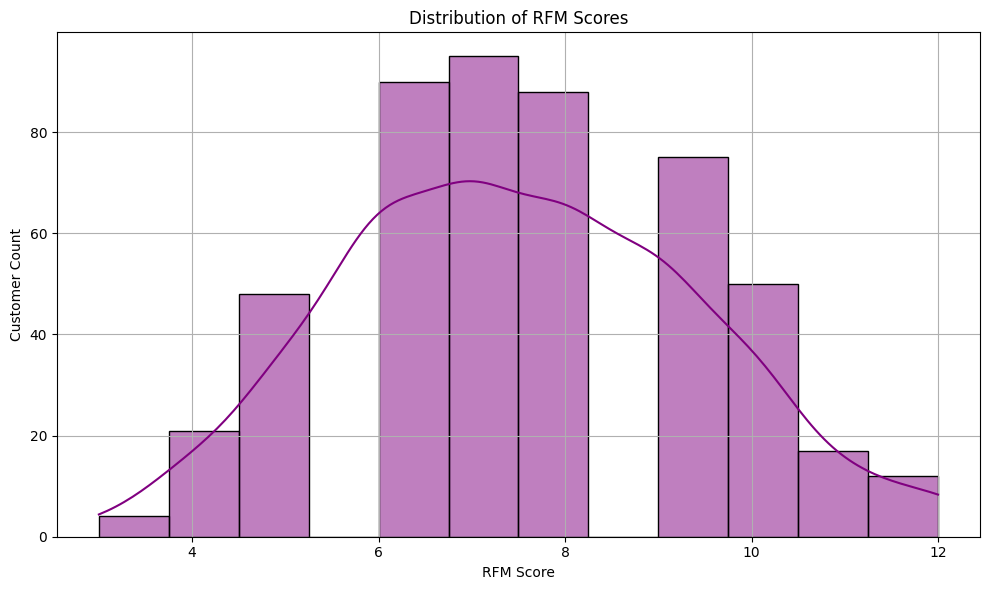

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Simulate transaction data
np.random.seed(42)
n = 500
df = pd.DataFrame({
    'CustomerID': np.arange(n),
    'LastPurchaseDaysAgo': np.random.randint(1, 365, n),
    'TotalPurchases': np.random.poisson(5, n),
    'TotalSpent': np.random.normal(5000, 1500, n)
})

# Step 3: RFM scoring
df['R_Score'] = pd.qcut(df['LastPurchaseDaysAgo'], 4, labels=[4,3,2,1])
df['F_Score'] = pd.qcut(df['TotalPurchases'].rank(method='first'), 4, labels=[1,2,3,4])
df['M_Score'] = pd.qcut(df['TotalSpent'], 4, labels=[1,2,3,4])
df['RFM_Segment'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)
df['RFM_Score'] = df[['R_Score','F_Score','M_Score']].sum(axis=1)

# Step 4: Visualize RFM distribution
plt.figure(figsize=(10,6))
sns.histplot(df['RFM_Score'], bins=12, kde=True, color='purple')
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Customer Count')
plt.grid(True)
plt.tight_layout()
plt.show()

**Executive Summary** :
- **Top Segment**: RFM 444 → Recent, frequent, high spenders  
- **At-Risk Segment**: RFM 111 → Infrequent, low spend, long inactive  
- **Recommendation**:  
  - Reward top-tier customers with loyalty perks  
  - Reactivate at-risk customers with win-back offers  
  - Tailor messaging by segment to improve ROI  
- **Impact**: RFM segmentation enables targeted campaigns and boosts retention